# ENGR-E 221 Homework 4: Linear Regression Model with Height Weight Data


## Starting point (0 points)

Get the height weight data file from assignment 4. Make
sure all the source code is in your root HW4 directory, and not in some weird sub-directory. Make sure you
can run the code (from within Jupyter or from within an interactive Python shell).

## 1: Visualize the data (10 points)

Create three plots:
    
A) show the distribution of weight

B) show the distribution of height

C) plot height vs. weight

Write a well thought out paragraph about what these plots show and tell me if you think the data is suitable for linear regression why or why not?

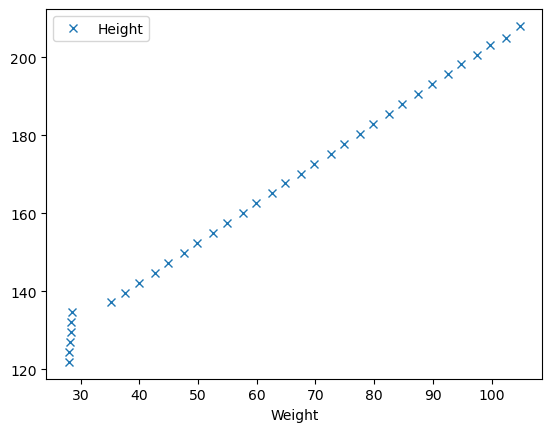

(35, 2)


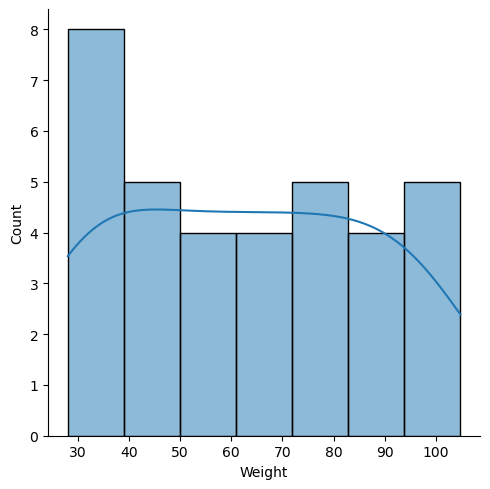

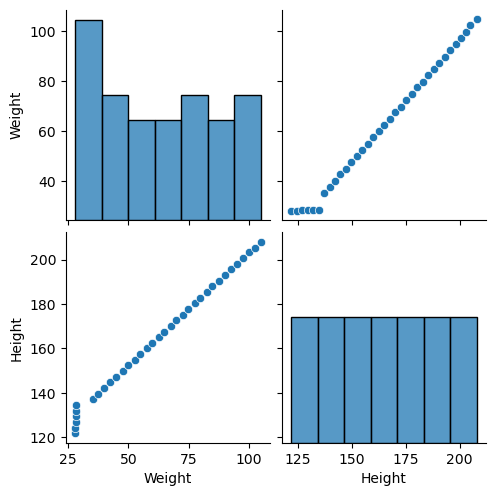

In [1]:
# Data was not cleaned since the data is already very small to effectively implement in this assignment.
import os 
import pandas as pd
import numpy as np

def get_path(filename):
    my_dir = os.getcwd()
    file_path = my_dir + filename
    return file_path

path = get_path("\Height_Weight.csv")
my_dataset = pd.read_csv(path)
my_dataset.shape
my_dataset.describe()

import matplotlib.pyplot as plt
max_t = my_dataset['Weight']
my_dataset.plot(x='Weight', y='Height', style='x')    
plt.show()

import seaborn as sb
sb.displot(my_dataset['Weight'],kde=True)
print(my_dataset.shape)
my_dataset.describe()
sb.pairplot(my_dataset)

### 1 Discussion

The data showcases the weights and the heights, we can see a cluster of data moveing nearly perfectly upward this is due to them having the same collected weight. Otherwise the data shows a linear increase in weight and height. This is also supported by the bar graphs that show a relatively stabel increase or decrease. This makes the data perfect for linear regression, since the data graph clearly show a linear relationship between the height and the weight.

## 2: Build a linear regression model (15 points)

We will not dictate which variables you use for x and y, I leave this up to you, however you should provide a sentence as to why you choose to use height or weight as y.

A) Define x and y with height and weight

B) Split the data into training and testing

C) Instantiate the linear model

D) Train the algorithm

E) Retrieve the intercept and the slope

F) Write a well thought out paragraph that discusses these results. Be sure to include a statement that for every unit change in height, weight changes by x, or visa versa.


Verify that the code can run from either a Jupyter notebook or an interactive Python shell.

In [2]:
# code for A-E here
x = my_dataset['Weight'].values.reshape(-1,1)
y = my_dataset['Height'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
split = 0.2 ; 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=0)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
my_mdl = lin_reg.fit(x_train,y_train)

print(my_mdl.intercept_)

print(my_mdl.coef_)

my_pred = lin_reg.predict(x_test)

testdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': my_pred.flatten()})
testdf

[99.85547598]
[[1.03714843]]


,Actual,Predicted
0,195.58,195.791706
1,172.72,172.248437
2,162.56,161.980667
3,193.04,192.991405
4,177.80,177.434179
5,160.02,159.595226
6,147.32,146.423441


### 2F Discussion

The data necessitates no cleaning given its small quantity. By employing linear regression, we can precisely ascertain the extent of change in height and weight. The y-intercept (height intercept) is 99.85, illustrating the baseline height. It increments by a factor of 1.037, representing the relationship between height and weight. For each unit increase in weight, the height augments by 1.037, and visa versa. This relationship is clearly displayed in the table of the linear regression points and the corresponding predicted values, which works together with the previous graphs after excluding the few similar points.

## 3: Make predictions using x\_test (10 points)

Now that we have built a model, lets test it! Using the x\_test predict values of y. Compare these predicted values of y to y\_test by creating a 1:1 plot or a scatter plot of predicted y values versus y\_test and discuss the meaning of this in 2-3 sentences.

<Axes: xlabel='Actual', ylabel='Predicted'>

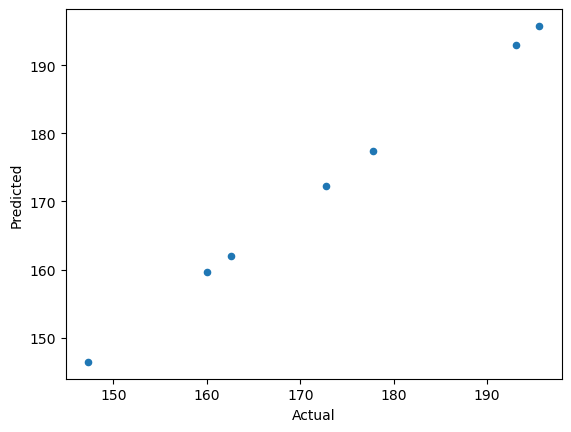

In [3]:
# prediction and plots here
testdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': my_pred.flatten()})
testdf
testdf.plot.scatter(x='Actual', y='Predicted')

### 3 Discussion

The predicted y values on this table create a perfectly linear model, while in reality (values of y) there is a small difference between each predicted y value and the y value. This diffrence can be as big as 1.5 units. This shows that the linear regression is doing a decent job of predicting the vlaues with an error margin of +-1.5 units.

## 4: Evaluate the performance of our model (10 points)

For regression algorithms there are three common metrics used being mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE), see equation below.

\begin{equation}
     MAE = \frac{\Sigma_{i=1}^{n} \left\lvert{y_i -\hat{y_i}}\right\rvert}{n}
\end{equation}

\begin{equation}
     MSE = {\frac{1}{n}\Sigma_{i=1}^{n}{\Big(y_i -\hat{y_i}}{\Big)^2}}
\end{equation}

\begin{equation}
     RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big({y_i -\hat{y_i}}\Big)^2}}
\end{equation}

Use the metrics module to obtain these values, and print them out. Write a paragraph that discusses what these values represent. Can a model with poor accuracy still make good predictions? You may want to go back and look at the values generated from .describe() and include them in this discussion.  

In [4]:
# place for metrics and performance results
from sklearn import metrics
def mdl_metrics(arg1,arg2):
    print('Mean Absolute Error:', metrics.mean_absolute_error(arg1, arg2))  
    print('Mean Squared Error:', metrics.mean_squared_error(arg1, arg2))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(arg1, arg2)))
    return 

mdl_metrics(y_test,my_pred)

Mean Absolute Error: 0.42833597684431524
Mean Squared Error: 0.24617950090219523
Root Mean Squared Error: 0.4961647920824242


### 4 Discussion

The mean absolute error indicate an error of 0.428 which refers that the predicted values are more than 50% accurate. The mean squared error indidcate a smaller error if 0.2461 showign the predicted values are nearly 76% correct. The root mean squared error (0.496) shows an error marign similar to the mean absolute error method (0.428). Therfore we can determine that the value of 0.428-0.496 error is more reliable than the 0.246 mean squared error. Despite the relatively poor score of the prediction method the predicted value had a relatively accurate result with an error margin of 1.5.

## 5: Discuss classes and methods used (5 points)

Write a paragraph that discusses the python classes used and the methods within those classes that were used. Discuss how we leverage methods, and tell me what an object is.

### 5 Discussion

The python classes used in this assignment are mdl_metrics and get_path. They were used to divide and orginize the code as well as reuse them in different points of the code. The methods used within those classes can be used without the classes but for get_path it was only the methods that determined the files path. On the otherhand the mdl_metrics contain only the methods used to determine the metrics of the linear regression graph. Objects are used to refer back to the classes and change the inputs for the classes which allows the the classes to be renewable.

## Bonus create your own RMSE function (1 point)

Use Equation the previous equation to create your own function to calculate RMSE given two arguments.

In [ ]:
# you RMSE function here